In [1]:
# Set-up

import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt

from matplotlib.ticker import StrMethodFormatter

from datetime import timedelta

import seaborn as sns

# Bring in quandl for downloading data
import quandl
# quandl.ApiConfig.api_key = 'YOUR_KEY_HERE'
quandl.read_key()


In [2]:
# Q1

housing = pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/properties_2016_sample10_1.csv')
pricing = pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/train_2016_v2.csv')


/Users/adamaiken/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298522 entries, 0 to 298521
Data columns (total 58 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   parcelid                      298522 non-null  int64  
 1   airconditioningtypeid         81220 non-null   float64
 2   architecturalstyletypeid      0 non-null       float64
 3   basementsqft                  152 non-null     float64
 4   bathroomcnt                   297341 non-null  float64
 5   bedroomcnt                    297341 non-null  float64
 6   buildingclasstypeid           1302 non-null    float64
 7   buildingqualitytypeid         193961 non-null  float64
 8   calculatedbathnbr             285491 non-null  float64
 9   decktypeid                    1670 non-null    float64
 10  finishedfloor1squarefeet      20096 non-null   float64
 11  calculatedfinishedsquarefeet  292951 non-null  float64
 12  finishedsquarefeet12          270833 non-nul

In [4]:
pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   parcelid         90275 non-null  int64  
 1   logerror         90275 non-null  float64
 2   transactiondate  90275 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ MB


In [5]:
zillow_data = pd.merge(housing, pricing, how='inner', on='parcelid')

In [6]:
# Q2

zillow_data['transactiondate'] = pd.to_datetime(zillow_data['transactiondate'], format='%Y-%m-%d')

print(zillow_data.transactiondate.min())
print(zillow_data.transactiondate.max())



2016-01-01 00:00:00
2016-12-30 00:00:00


In [7]:
# Q3

zillow_data.groupby('yearbuilt')['logerror'].agg('count').sort_values(ascending=False).to_frame().head(15)


,logerror
yearbuilt,
1955.0,234
1989.0,217
1950.0,208
1954.0,206
1973.0,181
1990.0,179
1987.0,173
1964.0,169
1956.0,168


In [8]:


zillow_data.groupby(['regionidcounty', 'regionidzip'])['logerror'].agg('count').sort_values(ascending=False).to_frame().head(15)



logerror
regionidcounty regionidzip          
1286.0         96974.0            96
3101.0         97319.0            90
1286.0         96987.0            86
3101.0         97328.0            82
1286.0         96993.0            77
               96996.0            68
3101.0         97318.0            66
               97329.0            64
1286.0         96964.0            61
2061.0         97118.0            59
1286.0         96995.0            58
               96954.0            58
2061.0         97091.0            57
               96351.0            56
3101.0         96193.0            56

In [9]:
# Q4

zillow_data.groupby('yearbuilt')[['bathroomcnt', 'bedroomcnt']].agg([np.mean, np.median]).round(1) 


bathroomcnt        bedroomcnt       
                 mean median       mean median
yearbuilt                                     
1885.0            1.0    1.0        2.0    2.0
1890.0            1.0    1.0        3.3    3.0
1895.0            2.0    2.0        3.3    4.0
1896.0            1.0    1.0        3.0    3.0
1898.0            1.0    1.0        2.5    2.5
...               ...    ...        ...    ...
2011.0            3.2    3.0        3.5    3.0
2012.0            3.1    3.0        3.6    3.0
2013.0            3.1    3.0        3.2    3.0
2014.0            3.7    3.5        3.4    3.0
2015.0            3.0    3.0        2.0    2.0

[120 rows x 4 columns]

In [10]:
zillow_data[zillow_data['yearbuilt'] >= 1995].groupby('yearbuilt')[['bathroomcnt', 'bedroomcnt']].agg([np.mean, np.median]).round(1) 


bathroomcnt        bedroomcnt       
                 mean median       mean median
yearbuilt                                     
1995.0            2.8    2.5        3.4    3.0
1996.0            2.8    3.0        3.2    3.0
1997.0            3.1    3.0        3.8    4.0
1998.0            3.1    3.0        3.5    3.0
1999.0            3.1    3.0        3.6    4.0
2000.0            3.1    3.0        3.6    4.0
2001.0            3.0    3.0        3.5    3.0
2002.0            3.0    3.0        3.6    4.0
2003.0            3.0    3.0        3.4    3.0
2004.0            3.1    3.0        3.4    3.0
2005.0            3.2    3.0        3.5    3.0
2006.0            3.2    3.0        3.2    3.0
2007.0            3.0    3.0        3.2    3.0
2008.0            2.9    3.0        2.8    3.0
2009.0            3.0    3.0        3.1    3.0
2010.0            3.0    2.5        3.1    3.0
2011.0            3.2    3.0        3.5    3.0
2012.0            3.1    3.0        3.6    3.0
2013.0            3.1    3.0        3.2    3.0
2014.0            3.7    3.5        3.4    3.0
2015.0            3.0    3.0        2.0    2.0

In [11]:
# Q5

df = zillow_data[['parcelid', 'logerror', 'transactiondate']]

dupes = df.duplicated(subset=['parcelid'], keep=False)
non_unique_data = df.loc[dupes]
non_unique_data


,parcelid,logerror,transactiondate
431,14607531,-0.0965,2016-06-23
432,14607531,0.0070,2016-08-29
1536,14444102,-0.1948,2016-04-29
1537,14444102,-0.0812,2016-10-05
1952,11122560,-0.0202,2016-02-08
1953,11122560,-0.0192,2016-08-16
2209,11866315,-0.0010,2016-01-12
2210,11866315,0.0488,2016-06-14
2755,14621246,-0.0141,2016-05-05
2756,14621246,0.0159,2016-12-07


In [12]:
# Q6

zillow_data['houses_sold'] = zillow_data.groupby('regionidzip')['logerror'].transform('count')

df = zillow_data[zillow_data.houses_sold >= 10].copy()


In [13]:
df['logerror_abs'] = df['logerror'].abs()

df.groupby('regionidzip')['logerror_abs'].agg([np.mean, np.median]).sort_values(by = 'mean', ascending=False).head(10).round(5)


,mean,median
regionidzip,,
95992.0,0.23285,0.08450
96058.0,0.23245,0.06580
96969.0,0.22696,0.07420
95984.0,0.22463,0.11090
96043.0,0.22428,0.05450
96480.0,0.20235,0.11600
95983.0,0.19180,0.09225
96083.0,0.18215,0.07470
95999.0,0.17167,0.09980


In [14]:
# Q7

zillow_data['logerror_abs'] = zillow_data['logerror'].abs()

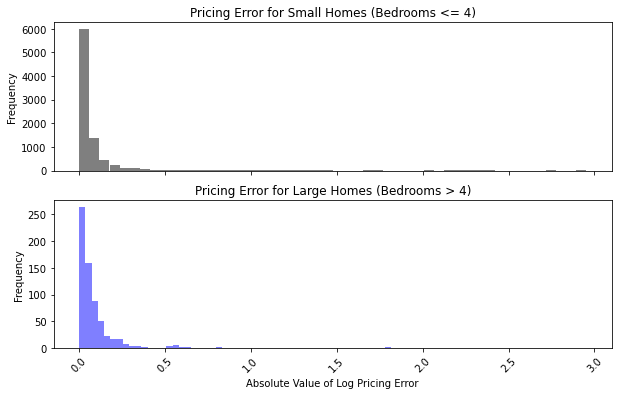

In [15]:

fig, axs = plt.subplots(2, 1, sharex=True, sharey=False, figsize=(10, 6))

small = zillow_data[zillow_data['bedroomcnt'] <= 4]
large = zillow_data[zillow_data['bedroomcnt'] > 4]

axs[0].hist(small['logerror_abs'], bins=50, color='k', alpha=0.5)
axs[1].hist(large['logerror_abs'], bins=50, color='b', alpha=0.5)

axs[1].set_xlabel('Absolute Value of Log Pricing Error')

axs[0].set_ylabel('Frequency')
axs[1].set_ylabel('Frequency')

axs[0].set_title('Pricing Error for Small Homes (Bedrooms <= 4)', fontsize = 12)
axs[1].set_title('Pricing Error for Large Homes (Bedrooms > 4)', fontsize = 12)

axs[1].ticklabel_format(axis='x', style='plain')

axs[1].tick_params(axis='x', rotation=45);

In [16]:
# Q8 - I added my "home" county

regions = quandl.get_table("ZILLOW/REGIONS", paginate=True)
zsfh = quandl.get_table('ZILLOW/DATA', indicator_id='ZSFH', region_id=['1289', '2402', '2694'])
zatt = quandl.get_table('ZILLOW/DATA', indicator_id='ZATT', region_id=['1289', '2402', '2694'])
zabt = quandl.get_table('ZILLOW/DATA', indicator_id='ZABT', region_id=['1289', '2402', '2694'])

In [17]:
# Q9

indices = zsfh.append(zatt, ignore_index=True, sort=False)
indices = indices.append(zabt, ignore_index=True, sort=False)




In [18]:
# Q10

indices['pct'] = indices.sort_values('date', ascending=True).groupby(['indicator_id', 'region_id']).value.pct_change()
indices


,indicator_id,region_id,date,value,pct
0,ZSFH,2694,2021-07-31,606744.0,0.021406
1,ZSFH,2694,2021-06-30,594028.0,0.021274
2,ZSFH,2694,2021-05-31,581654.0,0.019367
3,ZSFH,2694,2021-04-30,570603.0,0.018049
4,ZSFH,2694,2021-03-31,560487.0,0.013926
...,...,...,...,...,...
2593,ZABT,1289,2000-12-31,116436.0,0.006561
2594,ZABT,1289,2000-11-30,115677.0,0.006833
2595,ZABT,1289,2000-10-31,114892.0,0.002085
2596,ZABT,1289,2000-09-30,114653.0,0.003721


In [19]:
indices = indices[indices['indicator_id']=='ZSFH']

indices.drop('indicator_id', axis=1, inplace=True)

indices = pd.pivot(indices, values='value', columns='region_id', index='date')

indices

/Users/adamaiken/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


region_id,1289,2402,2694
date,,,
1996-01-31,NaN,120273.0,276587.0
1996-02-29,NaN,120609.0,276894.0
1996-03-31,NaN,120991.0,277282.0
1996-04-30,NaN,121728.0,278054.0
1996-05-31,NaN,122444.0,278713.0
...,...,...,...
2021-03-31,377670.0,366835.0,560487.0
2021-04-30,383857.0,374592.0,570603.0
2021-05-31,392407.0,383973.0,581654.0


<AxesSubplot:xlabel='date'>

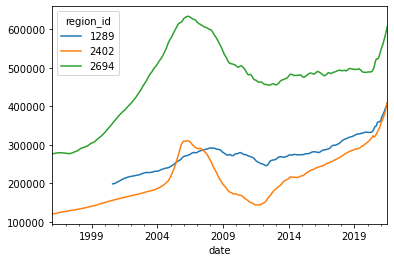

In [20]:
indices.plot()